In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

In [2]:
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

In [3]:
enrollments = read_csv('C:/udacity27/enrollments.csv')
daily_engagement = read_csv('C:/udacity27/daily-engagement.csv')
project_submissions = read_csv('C:/udacity27/project-submissions.csv')

In [4]:
for element in daily_engagement:
    element['account_key'] = element['acct']
    del element["acct"]

In [5]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [6]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{'account_key': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [7]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

In [8]:
def find_num_row(inputfile):
    return len(inputfile)


def find_unique(inputfile):
    unique_students = []
    for entry in inputfile:
        if entry['account_key'] not in unique_students:
            unique_students.append(entry['account_key'])
    return unique_students

In [9]:
enrollment_num_rows = find_num_row(enrollments)
enrollment_num_unique_students = len(find_unique(enrollments))

engagement_num_rows = find_num_row(daily_engagement)
engagement_unique_students = find_unique(daily_engagement)
engagement_num_unique_students = len(engagement_unique_students)

submission_num_rows = find_num_row(project_submissions)
submission_num_unique_students = len(find_unique(project_submissions))


In [10]:
print enrollment_num_rows
print enrollment_num_unique_students

1640
1302


In [11]:
print engagement_num_rows
print engagement_num_unique_students

136240
1237


In [12]:
print submission_num_rows
print submission_num_unique_students

3642
743


In [13]:
num_student_mismatch = []
for enrollment in enrollments:
    unique_student = enrollment["account_key"]
    if unique_student not in engagement_unique_students:
        num_student_mismatch.append(enrollment)
    

In [14]:
len(num_student_mismatch)

71

In [15]:
num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if (student not in engagement_unique_students and 
            enrollment['join_date'] != enrollment['cancel_date']):
        print enrollment
        num_problem_students += 1

num_problem_students

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


3

In [16]:
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [17]:
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [18]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


In [19]:
paid_students = {}
for enrollment in non_udacity_enrollments:
    account_key = enrollment['account_key']
    enrollment_date = enrollment['join_date']
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        if account_key not in paid_students or \
                enrollment_date > paid_students[account_key]:
            paid_students.update({account_key:enrollment_date})
len(paid_students)

995

In [20]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [21]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [22]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

1293
134549
3618


In [23]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [24]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []

for engagement in paid_engagement:
    account_key = engagement['account_key']
    join_date = paid_students[account_key]
    engagement_date = engagement['utc_date']
    if within_one_week(join_date, engagement_date):
        paid_engagement_in_first_week.append(engagement)
len(paid_engagement_in_first_week)

6919

In [25]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
# engagement_by_account = defaultdict(list)
# for engagement_record in paid_engagement_in_first_week:
#     account_key = engagement_record['account_key']
#    engagement_by_account[account_key].append(engagement_record)
def group_data(data, key_name):
    group_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        group_data[key].append(data_point)
    return group_data

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')

In [26]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
# total_minutes_by_account = {}
# for account_key, engagement_for_student in engagement_by_account.items():
#     total_minutes = 0
#    for engagement_record in engagement_for_student:
#         total_minutes += engagement_record['total_minutes_visited']
#    total_minutes_by_account[account_key] = total_minutes
def sum_group_items(group_data, field_name):
    summed_data = {}
    for key, data_points in group_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_group_items(engagement_by_account, 'total_minutes_visited')

Populating the interactive namespace from numpy and matplotlib
Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


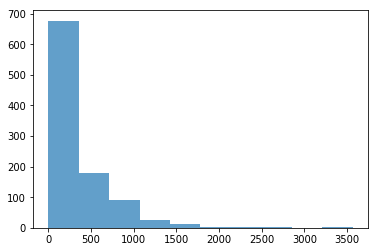

In [27]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    plt.hist(data, alpha=0.7)

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
describe_data(total_minutes)

In [28]:
student_with_max_minutes = None
max_minutes = 0
for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student
max_minutes

3564.7332644989997

In [29]:
# Debug
# for engagement_record in paid_engagement_in_first_week:
#   if engagement_record['account_key'] == student_with_max_minutes:
#       print engagement_record

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


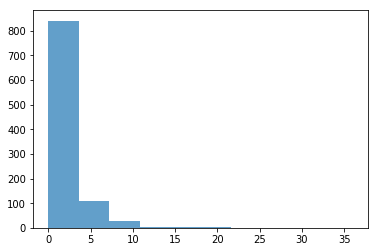

In [30]:
# def find_record(data_key):
    # generict_dict_by_account = {}
    # for account_key, engagement_for_student in engagement_by_account.items():
        # data_total = 0
        # for engagement_record in engagement_for_student:
            # data_total += engagement_record[data_key]
        # generict_dict_by_account[account_key] = data_total
    # return generict_dict_by_account
# students_completed_lessons = find_record('lessons_completed')

# total_lessons = students_completed_lessons.values()
# print 'Mean:', np.mean(total_lessons)
# print 'Standard deviation:', np.std(total_lessons)
# print 'Minimum:', np.min(total_lessons)
# print 'Maximum:', np.max(total_minutes)

lessons_completed_by_account = sum_group_items(engagement_by_account, 'lessons_completed')
describe_data(lessons_completed_by_account.values())

In [31]:
# for account_key, engagement_for_student in engagement_by_account.items():
#     for engagement_record in engagement_for_student:
#         if engagement_record['total_minutes_visited'] == 0:
#             engagement_record['has_visited'] = 0
#         else:
#            engagement_record['has_visited'] = 1
# added on an earlier cell as per instructor

# debug engagement_by_account

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


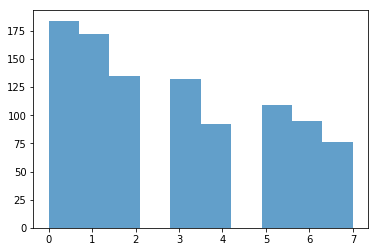

In [32]:
day_visited_by_account = sum_group_items(engagement_by_account, 'has_visited')
describe_data(day_visited_by_account.values())

In [33]:
paid_submissions[1]

{u'account_key': u'256',
 u'assigned_rating': u'INCOMPLETE',
 u'completion_date': datetime.datetime(2015, 1, 13, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 10, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

In [34]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']
pass_subway_project = set()

for student_assess in paid_submissions:
    project = student_assess['lesson_key']
    rating = student_assess['assigned_rating']
    if project in subway_project_lesson_keys and \
            (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_subway_project.add(student_assess['account_key'])
        
# for student_assess in paid_submissions:
#    if student_assess['lesson_key'] in subway_project_lesson_keys and student_assess['account_key'] not in passed_students:
#        inc_assessment.append(student_assess)
len(pass_subway_project)

647

In [35]:
# mistake in lesson need to split the paid engagement not just the students on the paid submission
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print len(passing_engagement)
print len (non_passing_engagement)
# print non_passing_engagement

4527
2392


In [36]:
non_pass_subway_project = set()
for students in non_passing_engagement:
    non_pass_subway_project.add(students['account_key'])
len(non_pass_subway_project)
# print engagement_by_account

348

Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36


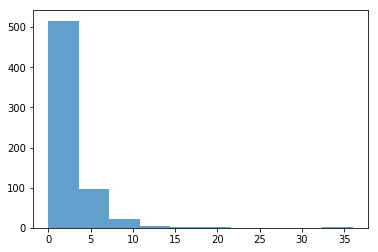

In [37]:
engagement_by_account_pass = defaultdict(list)

for key, student_data in engagement_by_account.items():
    if key in pass_subway_project:
        for student_datum in student_data:
            engagement_by_account_pass[key].append(student_datum)

lessons_completed_by_account = sum_group_items(engagement_by_account_pass, 'lessons_completed')
describe_data(lessons_completed_by_account.values())
# engagement_by_account_pass

Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


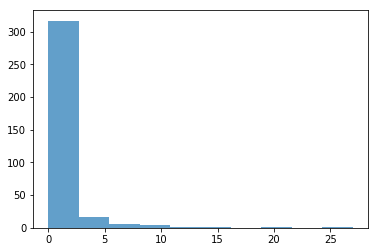

In [38]:
engagement_by_account_non_pass = defaultdict(list)

for key, student_data in engagement_by_account.items():
    if key in non_pass_subway_project:
        for student_datum in student_data:
            engagement_by_account_non_pass[key].append(student_datum)

lessons_completed_by_account_non = sum_group_items(engagement_by_account_non_pass, 'lessons_completed')
describe_data(lessons_completed_by_account_non.values())

In [39]:
passing_engagement_by_account = group_data(passing_engagement, 'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')

pass
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36
non-pass
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


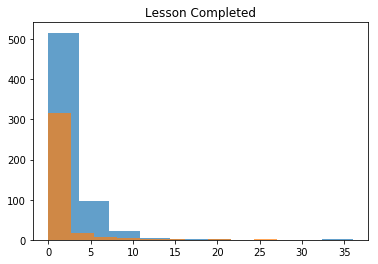

In [40]:
plt.title("Lesson Completed")
print "pass"
pass_lesson = sum_group_items(passing_engagement_by_account, 'lessons_completed')
describe_data(pass_lesson.values())

print "non-pass"
non_lesson = sum_group_items(non_passing_engagement_by_account, 'lessons_completed')
describe_data(non_lesson.values())

pass
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
non-pass
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


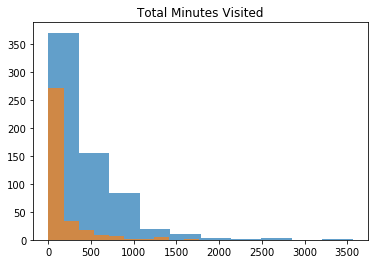

In [41]:
plt.title("Total Minutes Visited")
print "pass"
pass_minutes = sum_group_items(passing_engagement_by_account, 'total_minutes_visited')
describe_data(pass_minutes.values())
print "non-pass"
non_minutes = sum_group_items(non_passing_engagement_by_account, 'total_minutes_visited')
describe_data(non_minutes.values())

pass
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7
non-pass
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


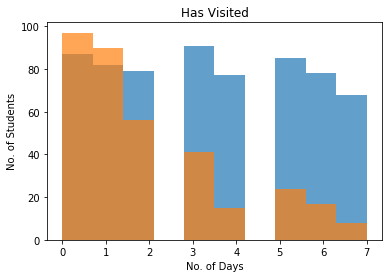

In [91]:
plt.title("Has Visited")
plt.ylabel("No. of Students")
plt.xlabel("No. of Days")

print "pass"
pass_visited = sum_group_items(passing_engagement_by_account, 'has_visited')
describe_data(pass_visited.values())
print "non-pass"
non_visited = sum_group_items(non_passing_engagement_by_account, 'has_visited')
describe_data(non_visited.values())

In [43]:
def make_list(gen_dict):
    gen_list = []
    for key in gen_dict:
        gen_list.append(gen_dict[key])
    return gen_list


Populating the interactive namespace from numpy and matplotlib
pass
non pass


(array([ 272.,   34.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454987,   530.5568248 ,
          707.40909973,   884.26137467,  1061.1136496 ,  1237.96592453,
         1414.81819947,  1591.6704744 ,  1768.52274933]),
 <a list of 10 Patch objects>)

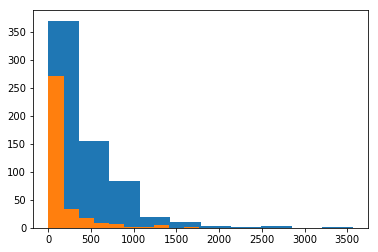

In [44]:
%pylab inline
pass_minutes_list = make_list(pass_minutes)

print "pass"
plt.hist(pass_minutes_list)

print "non pass"
non_pass_minutes_list = make_list(non_minutes)
plt.hist(non_pass_minutes_list)

Populating the interactive namespace from numpy and matplotlib
pass
non pass


(array([ 317.,   17.,    6.,    4.,    1.,    1.,    0.,    1.,    0.,    1.]),
 array([  0. ,   2.7,   5.4,   8.1,  10.8,  13.5,  16.2,  18.9,  21.6,
         24.3,  27. ]),
 <a list of 10 Patch objects>)

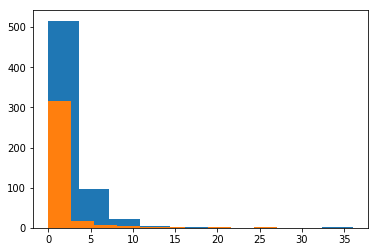

In [45]:
%pylab inline
pass_lesson_list = make_list(pass_lesson)

print "pass"
plt.hist(pass_lesson_list)

print "non pass"
non_lesson_list = make_list(non_lesson)
plt.hist(non_lesson_list)

Populating the interactive namespace from numpy and matplotlib


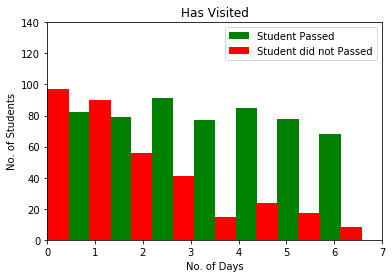

In [92]:
import seaborn as sns
%pylab inline
plt.title("Has Visited")
plt.ylabel("No. of Students")
plt.xlabel("No. of Days")
plt.axis([0,7,0,140])
pass_visited_list = make_list(pass_visited)
# print "pass"
plt.hist(pass_visited_list, bins=8, color='g', width=0.45, align='left', label='Student Passed')

# print "non pass"
non_visited_list = make_list(non_visited)
plt.hist(non_visited_list, bins=8, color='r', width=0.45, align="mid", label='Student did not Passed')
plt.legend(loc="upper right")